In [5]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_absolute_error, r2_score
from sklearn.preprocessing import LabelEncoder

In [7]:
data = pd.read_csv(r'C:\Users\vaish\Downloads\archive (3)\car data.csv')

In [9]:
data['Car_Age'] = 2025 - data['Year']  
data.drop(['Car_Name', 'Year'], axis=1, inplace=True)

In [13]:
le = LabelEncoder()
for col in ['Fuel_Type', 'Selling_type', 'Transmission']:
 data[col] = le.fit_transform(data[col])

In [15]:
 X = data.drop('Selling_Price', axis=1)
 y = data['Selling_Price']

In [17]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [19]:
 rf_model = RandomForestRegressor(n_estimators=100, random_state=42)
 rf_model.fit(X_train, y_train)

RandomForestRegressor(random_state=42)

In [21]:
y_pred = rf_model.predict(X_test)

In [23]:
 mae = mean_absolute_error(y_test, y_pred)
 r2 = r2_score(y_test, y_pred)

In [25]:
 print(f'Mean Absolute Error: {mae:.2f}')
 print(f'R-squared Score: {r2:.2f}')

Mean Absolute Error: 0.64
R-squared Score: 0.96


In [29]:
comparison_df = pd.DataFrame({'Actual Price': y_test.values, 'Predicted Price': y_pred})

print(comparison_df.head(10))

   Actual Price  Predicted Price
0          0.35           0.4440
1         10.11          10.8836
2          4.95           4.9115
3          0.15           0.2194
4          6.95           7.8210
5          7.45           6.2270
6          1.10           1.0980
7          0.50           0.5899
8          0.45           0.4704
9          6.00           6.8995


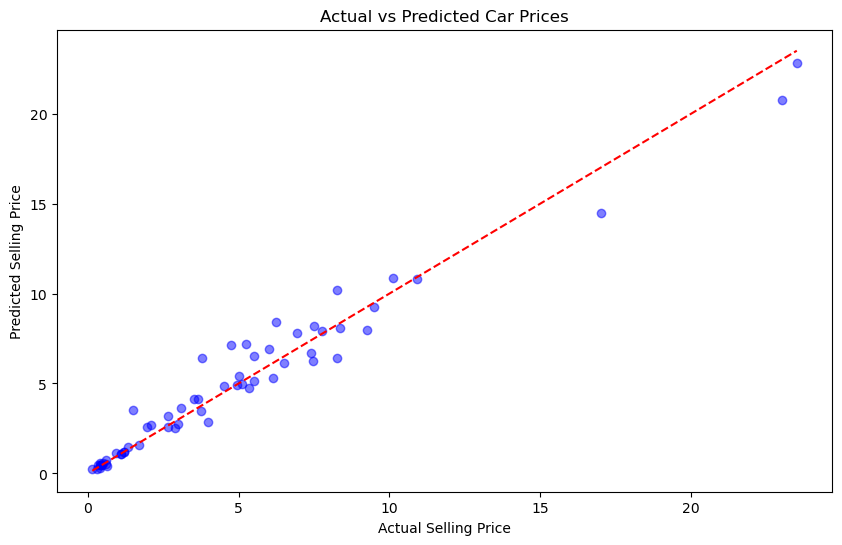

In [31]:
 plt.figure(figsize=(10, 6))
 plt.scatter(y_test, y_pred, color='blue', alpha=0.5)
 plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'r--')  
 plt.xlabel('Actual Selling Price')
 plt.ylabel('Predicted Selling Price')
 plt.title('Actual vs Predicted Car Prices')
 plt.show()